# WeatherPy
----

#### Observations

* The main question of this analysis was : "What's the weather like as we approach the equator?", and although this is obvious", it was proved throught this data analysis that the answer is : "It gets hotter"; and this can be observed and justified looking at Fig 1, Fig 5 and Fig 6, where temperature increase from negative latitudes to 0 latitude (equator); and aversely decrease as it move from the equator to the north, or positive latitudes.


* In addition to check temperature's behaviour with respect the Latitude, other variables such as Humidity, Cloudiness and Wind Speed were also analyzed, but none of them has a clear correlation versus Latitude. As it is observed from Figures 7 to 12, and even separating northern and southern hemispheres, these variables don't show a comprenhensive relationship with the latitude; and this can be explained because these variables are not "Directly" dependent on Latitude, but on other meteorology variables such as the same temperature and water vapor for the Humidity and Cloudiness case, and altitude and sea level for the Wind Speed case. Saying this, I'm not confirming that these three variable only depends on the previous mentioned factors, but thinking in making an extra analysis, it can help in determining better insights and trends, which helps to create better predictive models.


* Linear regressions are a good alternative to make predictions, but you must be careful of how good is the model. For this Weather Study, different regression models were generated for each one of the analyzed variables (temperature, humidity,cloudiness and wind speed) with respect Latitude. According to this, only Temperature has an acceptable model, but it's not the best if we want to use it to make predictions, taking in count that the r-squared factor is not very close to 1, which means that the variability of the temperature is not in at least a 90% explained by the Latitude.


* Even though the main question of this analysis was answered and justified. It's a very good idea to include additional charts to analyze other trends, such as Humidity vs Water Vapor, Wind Speed and Sea Level, Wind Speed and altitude, Cloudiness and precipitations, etc. This can give a better insight of how variables are correlated and what are the main patterns for each variable.  

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
#To run this query, store the api_key as "weather_api_key"
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


634

### Perform API Calls
* Weather check on each city using a series of successive API calls.
* Retrieving latitude, longitude, temperature and more key variables for the analysis.

In [3]:
# Base API url from OpenWeather documentation
base_url= "http://api.openweathermap.org/data/2.5/weather?"
url= f"{base_url}appid={weather_api_key}&units=imperial&q="

print(f"Beginning Data Retrieval")
print(f"---------------------------")

# Creating empty lists to store data from the API calls
set_counter=1
city_counter=1
humidity=[]
city_name=[]
lat=[]
lng=[]
max_temp = []
cloudiness = []
wind_speed = []
country= []
date=[]

# For loop to make successive API calls for each city
for city in cities:
    response_json = requests.get(url + city).json()
#Printing the proccessed city by set, including the city name
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
#City counter increased by one for each city
    city_counter+=1
# Sets of 50 cities were defined and a hold of one second between each set    
    if city_counter >= 51:
            time.sleep(1)
            city_counter=1
            set_counter+=1
#Exception in case the "random city" doesn't appear in the API.
#Appending API data to empty lists
    try: 
        humidity.append(response_json["main"]["humidity"])
        city_name.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
    except:
        print("City not found. Skipping...")
        pass
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

        
    


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | abhar
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | pangody
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | abay
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | rio bananal
Processing Record 21 of Set 1 | sovetskiy
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | 

Processing Record 38 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 4 | aksha
Processing Record 40 of Set 4 | blagoyevo
Processing Record 41 of Set 4 | tonj
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | zhigansk
Processing Record 44 of Set 4 | grand-lahou
Processing Record 45 of Set 4 | bokspits
City not found. Skipping...
Processing Record 46 of Set 4 | tecoanapa
Processing Record 47 of Set 4 | shu
Processing Record 48 of Set 4 | sabang
Processing Record 49 of Set 4 | kapiri mposhi
Processing Record 50 of Set 4 | sangar
Processing Record 1 of Set 5 | abu samrah
Processing Record 2 of Set 5 | vila praia de ancora
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | nokaneng
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | plastun
Processing Record 8 of Set 5 | chateaubelair
Processing Record 9 of Set 5 | silver city
Processing Record 10 

Processing Record 29 of Set 8 | severo-yeniseyskiy
Processing Record 30 of Set 8 | batemans bay
Processing Record 31 of Set 8 | abu dhabi
Processing Record 32 of Set 8 | nelson bay
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | tyup
Processing Record 35 of Set 8 | srivardhan
Processing Record 36 of Set 8 | fukue
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | panguna
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | weihe
Processing Record 42 of Set 8 | boda
Processing Record 43 of Set 8 | yuancheng
Processing Record 44 of Set 8 | nabire
Processing Record 45 of Set 8 | ixtapa
Processing Record 46 of Set 8 | tual
Processing Record 47 of Set 8 | waipawa
Processing Record 48 of Set 8 | vostok
Processing Record 49 of Set 8 | yulara
Processing Record 50 of Set 8 | prince rupert
Processing Record 1 of Set 9 | tumannyy
City not found. Skipping.

Processing Record 15 of Set 12 | shingu
Processing Record 16 of Set 12 | santa sofia
Processing Record 17 of Set 12 | santarem
Processing Record 18 of Set 12 | mont-de-marsan
Processing Record 19 of Set 12 | mitsamiouli
Processing Record 20 of Set 12 | tateyama
Processing Record 21 of Set 12 | proletarsk
Processing Record 22 of Set 12 | taoudenni
Processing Record 23 of Set 12 | novoagansk
Processing Record 24 of Set 12 | bogoslovka
Processing Record 25 of Set 12 | qabaqcol
Processing Record 26 of Set 12 | san cristobal
Processing Record 27 of Set 12 | waycross
Processing Record 28 of Set 12 | matara
Processing Record 29 of Set 12 | yarkovo
Processing Record 30 of Set 12 | port-gentil
Processing Record 31 of Set 12 | ranong
Processing Record 32 of Set 12 | port lincoln
Processing Record 33 of Set 12 | nogliki
Processing Record 34 of Set 12 | mokhsogollokh
Processing Record 35 of Set 12 | loikaw
Processing Record 36 of Set 12 | wewak
Processing Record 37 of Set 12 | san ramon de la nuev

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Dataframe created from previous lists
weather_data = pd.DataFrame({'City': city_name,'Latitude': lat,'Longitude': lng,'Max Temp':max_temp,'Humidity':humidity,
                         'Cloudiness':cloudiness,'Wind Speed':wind_speed,'Country':country,'Date':date})
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,32.00,94,4,6.02,AR,1592493596
1,Hobart,-42.88,147.33,41.00,86,100,10.29,AU,1592493512
2,Abhar,36.15,49.22,79.93,30,2,8.19,IR,1592493597
3,Rikitea,-23.12,-134.97,76.08,83,87,21.14,PF,1592493597
4,Barrow,71.29,-156.79,37.40,73,1,6.93,US,1592493302


In [5]:
# A list for encountered cities was created in a previous step. However, if a empty cell appear, it will be replaced by a "np.NaN"
weather_data.replace("",np.nan,inplace=True)
# If a np.NaN exist within the data, "dropna" function will delete it
weather_data.dropna(inplace=True)
weather_data.count()

City          582
Latitude      582
Longitude     582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Displaying a clean dataframe
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,32.00,94,4,6.02,AR,1592493596
1,Hobart,-42.88,147.33,41.00,86,100,10.29,AU,1592493512
2,Abhar,36.15,49.22,79.93,30,2,8.19,IR,1592493597
3,Rikitea,-23.12,-134.97,76.08,83,87,21.14,PF,1592493597
4,Barrow,71.29,-156.79,37.40,73,1,6.93,US,1592493302



## Inspecting the data and removing the cities where the humidity > 100%.
----

In [7]:
# Using describe function to visualize statistics metrics for each variable 
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.125481,18.929141,69.799467,66.902062,48.697595,8.472526,1.592494e+09
std,33.350384,90.627562,15.858847,22.810128,37.144848,5.749931,8.006221e+01
min,-54.800000,-175.200000,32.000000,6.000000,0.000000,0.430000,1.592493e+09
25%,-7.280000,-63.050000,57.520000,54.000000,14.250000,4.345000,1.592494e+09
50%,22.665000,24.110000,72.030000,73.000000,40.000000,6.930000,1.592494e+09
75%,49.005000,101.847500,80.637500,83.000000,84.750000,11.410000,1.592494e+09
max,78.220000,179.320000,115.020000,100.000000,100.000000,38.030000,1.592494e+09


In [8]:
# Cities with humidity index greater than 100% will be removed. Keep in mind that cities are generated randomly, and we are not sure if future cities list contain humidity "possile outliers"
#  Getting he indices of cities that have humidity over 100%.
humidity_index = weather_data.loc[weather_data["Humidity"]>100].index
humidity_index

Int64Index([], dtype='int64')

In [9]:
#New DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data= weather_data.drop(weather_data.index[humidity_index])
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,32.00,94,4,6.02,AR,1592493596
1,Hobart,-42.88,147.33,41.00,86,100,10.29,AU,1592493512
2,Abhar,36.15,49.22,79.93,30,2,8.19,IR,1592493597
3,Rikitea,-23.12,-134.97,76.08,83,87,21.14,PF,1592493597
4,Barrow,71.29,-156.79,37.40,73,1,6.93,US,1592493302


In [10]:
# Extracting and organizing relevant fields from the data frame
clean_city_data= clean_city_data[["City","Country","Latitude","Longitude","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
clean_city_data.head()

# Exporting the clean_city_data into a csv
clean_city_data.to_csv("output_data/cities.csv",encoding="utf-8",index=False,header=True)


## Plotting the Data
* Generating Scatter charts to see possible relationships between Latitude and other variables:


## Latitude vs. Temperature Plot

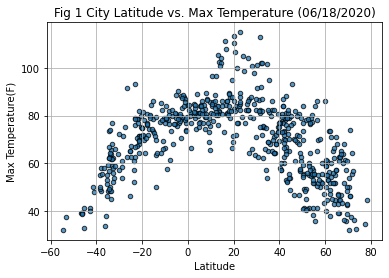

In [11]:
# generating a scatter plot from the cleaned datafra,e 
clean_city_data.plot("Latitude","Max Temp",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
# Coverting date format to m/d/y
converted_date= pd.to_datetime(clean_city_data.loc[0,"Date"],unit="s").strftime('%m/%d/%Y')
#Splitting the data formt to show only date
date_modified=str(converted_date).split()[0]
#styling the plot chart
plt.title(f"Fig 1 City Latitude vs. Max Temperature ({date_modified})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid()
#Saving plot as "png"
plt.savefig("output_data/Fig1.png")
plt.show()

##### Analysis

The above code generates a scatter plot to see the relationship between latitude for both northern and southern hemispheres, and max temprature reported to date. It is clear to see two different correlations for latitudes greater than zero (negative) and those that are less than zero (positive).

## Latitude vs. Humidity Plot

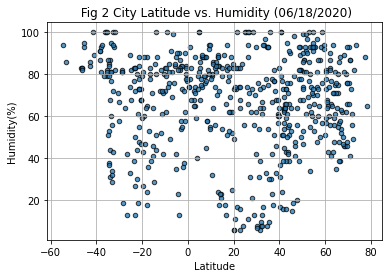

In [12]:
# Generating Scatter Plot
clean_city_data.plot("Latitude","Humidity",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
#Styling the chart
plt.title(f" Fig 2 City Latitude vs. Humidity ({date_modified})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()
#Saving plot as "png" file
plt.savefig("output_data/Fig2.png")
plt.show()

##### Analysis

From the same dataframe and using pandas plotting function, a scatter plot between Humidity to date vs Latitude was generated. It's quite difficult to see a clear correlation, due that Humidity don't have a "direct" relationship with latitude, but more with current temperature and other factors. If we generate a chart of Humidity vs Max Temp, we will notice an inverse relationship:

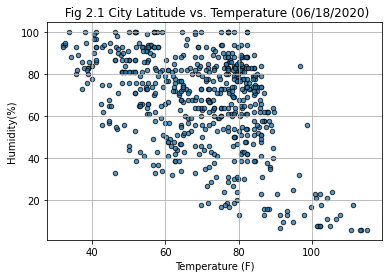

In [13]:
# Generating Scatter Plot
clean_city_data.plot("Max Temp","Humidity",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
#Styling the chart
plt.title(f" Fig 2.1 City Latitude vs. Temperature ({date_modified})")
plt.ylabel("Humidity(%)")
plt.xlabel("Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

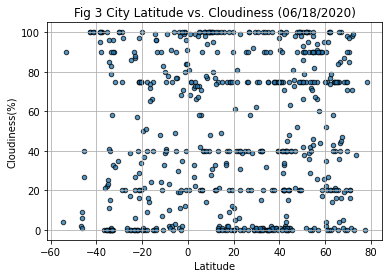

In [14]:
# Generating Scatter plot
clean_city_data.plot("Latitude","Cloudiness",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f"Fig 3 City Latitude vs. Cloudiness ({date_modified})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()
#Saving chart as a "png" file
plt.savefig("output_data/Fig3.png")
plt.show()

##### Analysis

This Latitude vs Cloudiness plot was generated using pandas function; and again, this chart is not showing a clear correlation between variables. Without being a weather expert, I think that its better to analyze Cloudiness with Humidity, taking in count that clouds are created due to the water vapor condensation in the sky. This is like a correlation chain, due that meteorology factors are related to each other, but looking at specific correlations sometimes its not too clear.

## Latitude vs. Wind Speed Plot

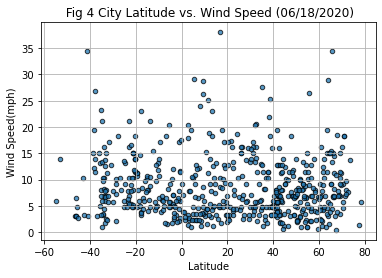

In [15]:
# Generating Scatter Plot
clean_city_data.plot("Latitude","Wind Speed",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f" Fig 4 City Latitude vs. Wind Speed ({date_modified})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()
#Saving chart as "png" file
plt.savefig("output_data/Fig4.png")
plt.show()

##### Analysis

The above chart was also generated with pandas. The behaviour between Wind Speed and Latitude is quite constant for both hemispheres; the data is not showing a tendency or a relation between the independent and dependent variable. If a deeper anlysis is needed, it is necessary to include the altitude variable to this analysis, and to identify also which cities are closer to the sea. 

## Linear Regression

Northern and Southern Hemispheres were separated in order to identify a better regression model between correlated variables.

In [16]:
# because several regression are needed, a python function was defined, in order to optimize the code
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

In [17]:
# Separating Northern and Southern Hemisphere DataFrames

northern_hemisphere= clean_city_data.loc[clean_city_data["Latitude"]>=0]
southern_hemisphere= clean_city_data.loc[clean_city_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5022569476634808


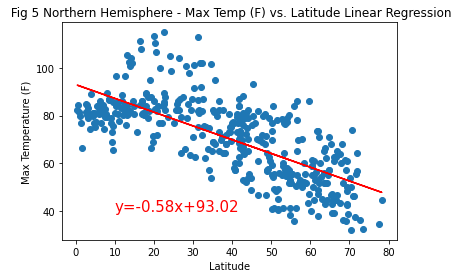

In [18]:
# Generating plot
# Returning regression fucntion
temp_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])
#Generating Scatter chart with pandas
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])
# Plotting the regression line
plt.plot(northern_hemisphere["Latitude"],temp_northern[0],"r-")
#Printing the line equation
plt.annotate(temp_northern[1],(10,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(" Fig 5 Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")
#Printing r-squared factor
print(f"The r-squared is : {temp_northern[2]}")
#saving plot as "png" file
plt.savefig("output_data/Fig5.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.6373282354458705


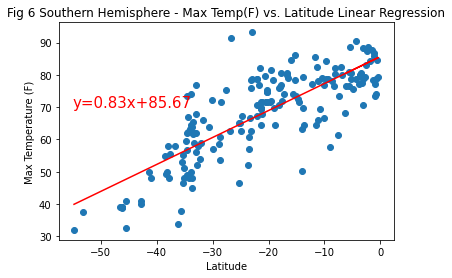

In [19]:
# Generating plot
# Returning regression fucntion
temp_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])
#Generating Scatter chart with pandas
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])
# Plotting the regression line
plt.plot(southern_hemisphere["Latitude"],temp_southern[0],"r-")
#Printing the line equation
plt.annotate(temp_southern[1],(-55,70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Fig 6 Southern Hemisphere - Max Temp(F) vs. Latitude Linear Regression")
#Printing r-squared factor
print(f"The r-squared is : {temp_southern[2]}")
#saving plot as "png" file
plt.savefig("output_data/Fig6.png")
plt.show()

##### Southern & Northern Hemisphere - Max Temp vs. Latitude Linear Regression Analysis

Looking at the scatter plots its clear to see a negative and a positive correlation for the northen and southern hemispheres, respectively. For this analysis, the r-squared factor give us an intuition of how good is the regression model. In this case r-squared of around 0.5 (remember that cities are generated randomly, so this factor can change), represents that 60% of the variance of "Max Temperature" variable is explained by the independent variable, or by "Latitude" in this case. This regression model is not 100% predictable, and other factors has to be analyzed in order to improve it. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0001840794858430014


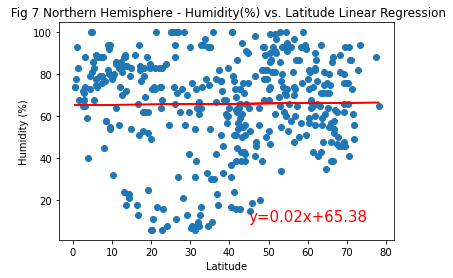

In [20]:
humidity_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.plot(northern_hemisphere["Latitude"],humidity_northern[0],"r-")
plt.annotate(humidity_northern[1],(45,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(" Fig 7 Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {humidity_northern[2]}")
plt.savefig("output_data/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.020527382114152136


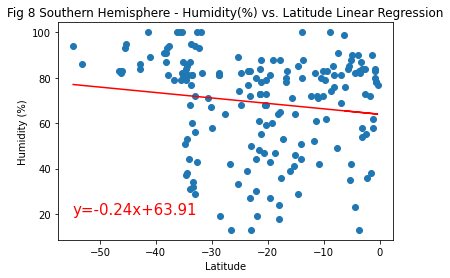

In [21]:
humidity_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.plot(southern_hemisphere["Latitude"],humidity_southern[0],"r-")
plt.annotate(humidity_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Fig 8 Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {humidity_southern[2]}")
plt.savefig("output_data/Fig8.png")
plt.show()

##### Southern & Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Analysis

Before to generate the regression, it was noticed that there is not a comprehensive relationship between humidity and latitude; and for this same reason, its not relevant to have a linear regression model. The r-squared factor in this case is approximately to zero, which means that almost nothing of the Humidity variation, it's explained by latitude. It is a big error if we used this model to make humidity predictions. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 8.476605944319e-05


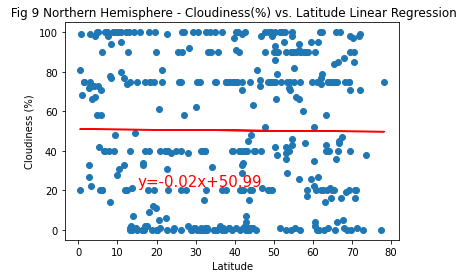

In [22]:
cloudiness_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.plot(northern_hemisphere["Latitude"],cloudiness_northern[0],"r-")
plt.annotate(cloudiness_northern[1],(15,22), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(" Fig 9 Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {cloudiness_northern[2]}")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.004757761760879275


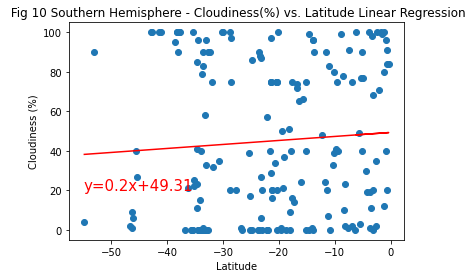

In [23]:
cloudiness_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.plot(southern_hemisphere["Latitude"],cloudiness_southern[0],"r-")
plt.annotate(cloudiness_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(" Fig 10 Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {cloudiness_southern[2]}")
plt.savefig("output_data/Fig10.png")
plt.show()

##### Southern & Northen Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Analysis

Again, since there is not a representative relation between Cloudiness and Latitude, its obvious that a regression model is not a good idea to describe the data and even to predict data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0004215880109741739


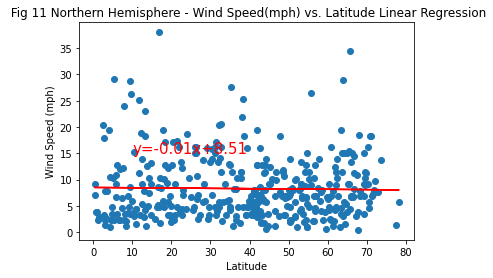

In [24]:
wind_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.plot(northern_hemisphere["Latitude"],wind_northern[0],"r-")
plt.annotate(wind_northern[1],(10,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(" Fig 11 Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is : {wind_northern[2]}")
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.01619479211957911


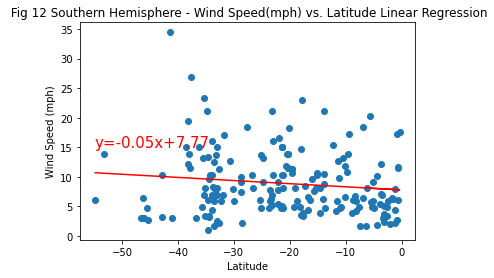

In [25]:
wind_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.plot(southern_hemisphere["Latitude"],wind_southern[0],"r-")
plt.annotate(wind_southern[1],(-55,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(" Fig 12 Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is : {wind_southern[2]}")
plt.savefig("output_data/Fig12.png")
plt.show()

##### Southern & Northen Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Analysis

For both hemispheres, Wind Speed and latitude doesn't has a specific trend, the linear regression model for both cases it's not a good representation of the data. More variables and more correlations need to be analyzed in order to generate a better model. 